In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras import applications

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import glob
import os
print("Dogs Dataset Folder Contain:",os.listdir("Images/"))

Dogs Dataset Folder Contain: ['.DS_Store', 'test_data', 'Train_data']


In [2]:
IMAGE_FOLDER_PATH="Images/Train_data"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
WIDTH=150
HEIGHT=150

for i in FILE_NAMES:
    if i == '.DS_Store':
        FILE_NAMES.remove(i)
        
targets=list()
full_paths=list()
for i in range(0, len(FILE_NAMES)):
    target=FILE_NAMES[i].split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, FILE_NAMES[i])
    full_paths.append(full_path)
    targets.append(target)

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets

In [3]:
def unique(list1): 
    # intilize a null list 
    unique_list = [] 
    for i in list1:
        if i not in unique_list:
            if len(unique_list) == len(list1):
                break
            unique_list.append(i)
    if unique_list[-1] == '':
        unique_list.remove(unique_list[-1])
    return unique_list


class_names = unique(targets)

In [4]:
dataset.head()

,image_path,target
0,Images/Train_data/Tibetan_terrier.200.jpg,Tibetan_terrier
1,Images/Train_data/Cairn.92.jpg,Cairn
2,Images/Train_data/Lhasa.5.jpg,Lhasa
3,Images/Train_data/Bernese_mountain_dog.169.jpg,Bernese_mountain_dog
4,Images/Train_data/Saymoyed.114.jpg,Saymoyed


In [5]:
test_image_folder_names="Images/test_data/Dog"
test_file_names=os.listdir(test_image_folder_names)
WIDTH=150
HEIGHT=150
for i in test_file_names:
    if i == '.DS_Store':
        test_file_names.remove(i)

test_image_target = list()
test_image_paths = list()

for i in  range(0, len(test_file_names)):
    targetss = test_file_names[i].split(".")[0]
    paths = os.path.join(test_image_folder_names, test_file_names[i])
    test_image_target.append(str(targetss))
    test_image_paths.append(paths)

In [6]:
test_datasets = pd.DataFrame()
test_datasets['test_image_path'] = test_image_paths
test_datasets['test_image_target'] = test_image_target

In [7]:
test_datasets['test_target'] = test_datasets['test_image_target'].astype(str)

In [8]:
test_datasets = test_datasets.drop(columns='test_image_target')

In [9]:
test_datasets['test_image_path'][0]

'Images/test_data/Dog/63.jpg'

In [10]:
test_datasets.head()

,test_image_path,test_target
0,Images/test_data/Dog/63.jpg,63
1,Images/test_data/Dog/6400.jpg,6400
2,Images/test_data/Dog/823.jpg,823
3,Images/test_data/Dog/4217.jpg,4217
4,Images/test_data/Dog/3578.jpg,3578


In [11]:
def get_side(img, side_type, side_size=5):
    height, width, channel = img.shape
    if side_type=="horizontal":
        return np.ones((height,side_size,  channel), dtype=np.float32)*255
        
    return np.ones((side_size, width,  channel), dtype=np.float32)*255

def show_gallery(show):
    n=5
    counter=0
    images=list()
    vertical_images=[]
    rng_state = np.random.get_state()
    np.random.shuffle(full_paths)
    np.random.set_state(rng_state)
    np.random.shuffle(targets)
    for path, target in zip(full_paths, targets):
        if target!=show:
            continue
        counter=counter+1
        if counter%10==0:
            break
        #Image loading from disk as JpegImageFile file format
        img=load_img(path, target_size=(WIDTH,HEIGHT))
        #Converting JpegImageFile to numpy array
        img=img_to_array(img)
        
        hside=get_side(img, side_type="horizontal")
        images.append(img)
        images.append(hside)

        if counter%5==0:
            himage=np.hstack((images))
            vside=get_side(himage, side_type="vertical")
            vertical_images.append(himage)
            vertical_images.append(vside)
            
            images=list()

    gallery=np.vstack((vertical_images)) 
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    title={"dog": "Dogs"}
    plt.title("5 samples of {} of the dataset".format(show))
    plt.imshow(gallery.astype(np.uint8))

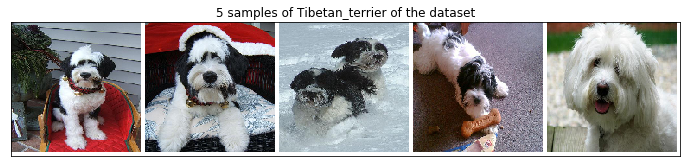

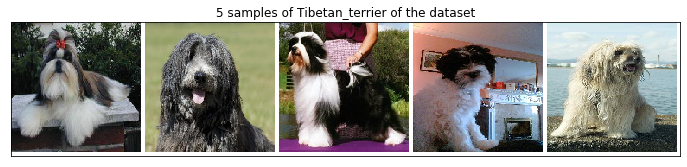

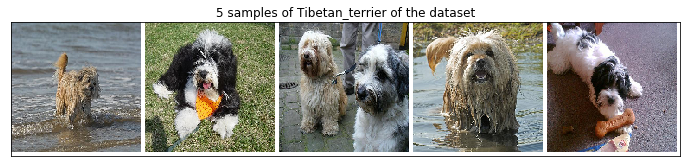

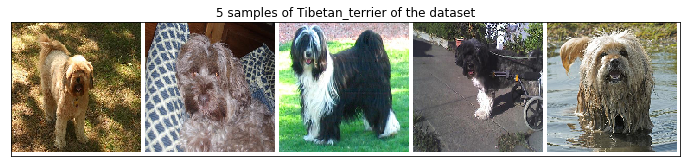

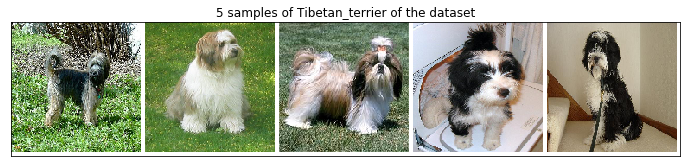

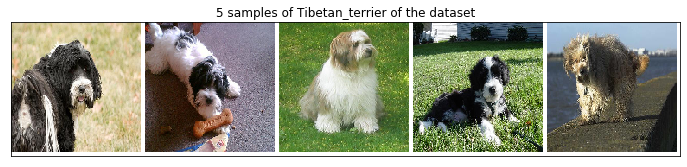

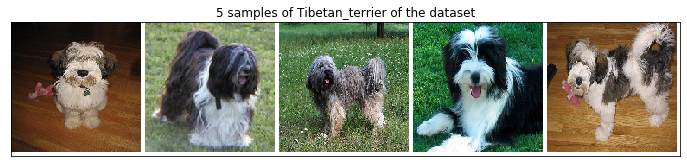

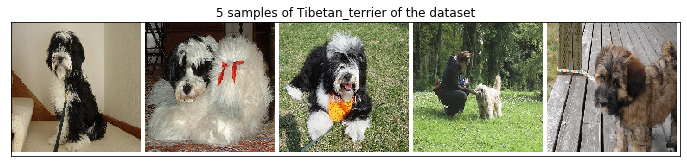

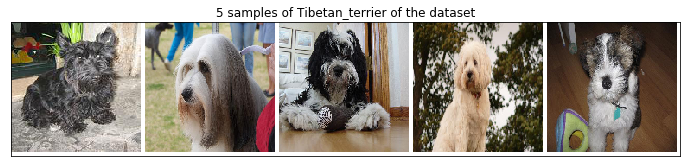

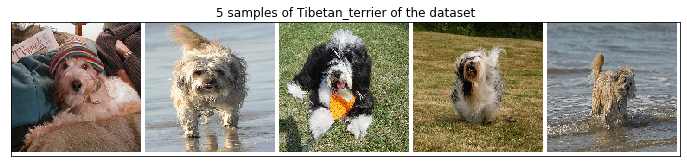

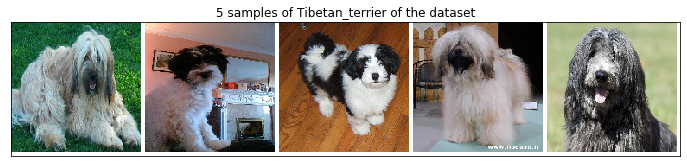

In [12]:
for i in range(0, 11):
    show_gallery(class_names[0])

In [13]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

In [14]:
model=models.Sequential()
model.add(layers.Conv2D(16, 3, padding='same',activation="relu", input_shape=(WIDTH, HEIGHT, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 90000)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                1440016   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,440,481
Trainable params: 1,440,481
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="binary_crossentropy", 
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [16]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=dataset,
                                                     x_col="image_path",
                                                     y_col="target",
                                                     target_size=(WIDTH, HEIGHT),
                                                     class_mode="categorical",
                                                     batch_size=250)

Found 20578 validated image filenames belonging to 120 classes.


In [17]:
# test_datagen=ImageDataGenerator(
#     rotation_range=15,
#     rescale=1./255,
#     shear_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1)
# test_datagenerator=test_datagen.flow_from_dataframe(dataframe=test_datasets,
#                                                     x_col="test_image_path",
#                                                     y_col ="test_target",
#                                                     target_size=(WIDTH, HEIGHT),
#                                                     class_mode="raw",
#                                                     batch_size=250)

In [18]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_datagenerator=test_datagen.flow_from_dataframe(dataframe=test_datasets,
                                                    x_col="test_image_path",
                                                    y_col = "test_target",
                                                    target_size=(WIDTH, HEIGHT),
                                                    class_mode="sparse",
                                                    batch_size=250)

Found 6743 validated image filenames belonging to 6743 classes.
